# <div style="text-align: center"> Introduction to Python and Machine Learning

## <div style="text-align: center">Machine Learning in Python (IV) - Neural Networks

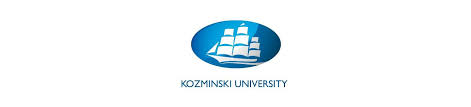
![logo2](https://efs.mrpips.gov.pl/__data/assets/image/0014/11336/04_zestawienie_power_rp_ue_efs.png)

---

In [12]:
from imports_for_ML import *

import keras

%matplotlib inline

ModuleNotFoundError: No module named 'imports_for_ML'

## Dataset - practicing with Neural Networks

<div class="alert alert-block alert-info">
📺 ************* WATCH AT HOME *************
<br>

The intro to the data and model used today:<br>
[Use TensorFlow to classify clothing images (Coding TensorFlow)](https://www.youtube.com/watch?v=FiNglI1wRNk)

</div>

We will use Zalando research team data: *Fashion MNIST*: https://www.kaggle.com/zalando-research/fashionmnist
<br><br>
If you get an error:
`IOError: CRC check failed 0xc187cf56L != 0x14c5212fL` <br>
then go to `(...)\.keras\datasets\fashion-mnist` and remove everything and <br>
go to `(...)\.keras/utils/data_utils.py` and just below the import statements, add:

``` python
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context
```

Save the file, restart Python, and the code below should work.

In [2]:
import tensorflow

In [3]:
mnist = tensorflow.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'G:\\Anaconda\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Note that the data is already divided into test and training data. What is the shape of the training data and correct labels?

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [14]:
pd.DataFrame(X_train[29])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,6,0,0,...,0,0,0,5,1,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,158,...,196,65,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,90,182,192,...,203,208,161,65,0,0,0,0,0,0
5,0,0,0,0,0,0,153,195,178,165,...,182,179,190,207,135,0,0,0,0,0
6,0,0,0,0,0,147,205,82,112,190,...,180,177,179,157,178,81,0,0,0,0
7,0,0,0,0,1,185,177,49,126,195,...,181,180,184,165,131,210,0,0,0,0
8,0,0,0,0,57,205,168,177,198,195,...,198,190,186,196,155,190,6,0,0,0
9,0,0,0,0,89,214,168,219,213,205,...,199,203,202,186,185,214,52,0,0,0


In [10]:
X_train[0].shape

(28, 28)

There are 60000 pictures in the X_train variable. What do you think are the other two values?

<div class="alert alert-block alert-success">
⚠️TASK 1
<br>

Please use the matplotlib function `imshow`, which allows you to change any numbers from any database to images. <br>
Please visualise the image nr `29`.

</div>

In [8]:
plt.imshow(X=X_train[29], cmap='binary')
# plt.axis('off')

NameError: name 'plt' is not defined

In [13]:
X_train[29][0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 59, 48, 43, 57,  8,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

What is the `y_train` value corresponding to the index of this picture? What do you think this value represents?

In [14]:
y_train[29]

4

In [15]:
pd.DataFrame(y_train)[0].nunique()

NameError: name 'pd' is not defined

In [23]:
pd.DataFrame(y_train)[0].unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [24]:
np.max(X_train)

255

In [26]:
X_train.max()

255

In [28]:
X_train[29].max()

255

In [27]:
X_train.min()

0

<div class="alert alert-block alert-success">
⚠️TASK 2
<br>

Behind this picture there is actually a two-dimensional matrix of numerical values, let us see the first 10 rows and 10 columns:

</div>

In [16]:
X_train[29, :10, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0, 158],
       [  0,   0,   0,   0,   1,   0,   0,  90, 182, 192],
       [  0,   0,   0,   0,   0,   0, 153, 195, 178, 165],
       [  0,   0,   0,   0,   0, 147, 205,  82, 112, 190],
       [  0,   0,   0,   0,   1, 185, 177,  49, 126, 195],
       [  0,   0,   0,   0,  57, 205, 168, 177, 198, 195],
       [  0,   0,   0,   0,  89, 214, 168, 219, 213, 205]], dtype=uint8)

In [17]:
plt.imshow(X_train[29, :10, :10], cmap='binary')

NameError: name 'plt' is not defined

we see that the left "shoulder" of the jacket is visible both in the picture and in the numbers.

---

Now let's display some images. First, let's draw the image indexes. We want to draw values from 0 up to the length of the `X_train` in a matrix of 3 rows per 5 columns:

In [36]:
len(X_train)

60000

In [34]:
X_train[59999]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [35]:
img_idx = np.random.randint(low=0, high=len(X_train)-1, size=(3, 5))

In [36]:
img_idx

array([[45378,  7259, 38936, 49091, 57884],
       [28064, 53807, 53740, 41461, 56637],
       [17513, 54879, 51923,  5345,  8416]])

We now use drawn indexes to display images. This code is more difficult, so you don't have to add anything to it, but it is worth trying to read it with understanding:

In [37]:
img_idx.shape

(3, 5)

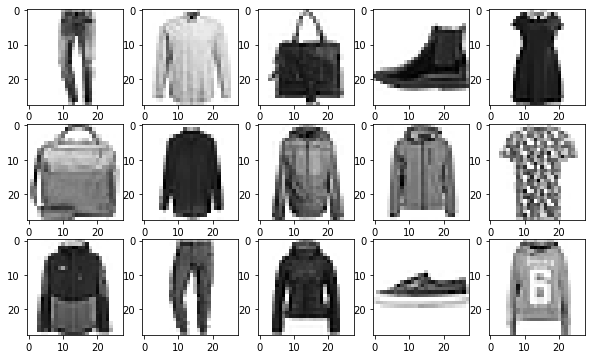

In [40]:
n_rows, n_cols = img_idx.shape
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10, 6))

for row in range(n_rows):
    for col in range(n_cols):
        ax[row, col].imshow(X_train[img_idx[row, col]], cmap='binary')
#         ax[row, col].set_xticks([])
#         ax[row, col].set_yticks([])

And what about the labels for these pictures?

<div class="alert alert-block alert-success">
⚠️TASK 3
<br>

Please present the `y_train` values for the above pictures:

</div>

In [41]:
img_idx

array([[45378,  7259, 38936, 49091, 57884],
       [28064, 53807, 53740, 41461, 56637],
       [17513, 54879, 51923,  5345,  8416]])

In [45]:
y_train[img_idx]

array([[1, 6, 8, 9, 3],
       [8, 6, 4, 4, 0],
       [4, 1, 4, 7, 2]], dtype=uint8)

When looking at the convergence between digital labels and images, do you guess what digital labels mean?

But we don't have to guess, on the datasheet page we find a description of the labels:https://www.kaggle.com/zalando-research/fashionmnist

Label	| Meaning
---|---
`0`	| T-shirt/top
`1`	| Trouser
`2`	| Pullover
`3`	| Dress
`4`	| Coat
`5`	| Sandal
`6`	| Shirt
`7`	| Sneaker
`8`	| Bag
`9`	| Ankle boot

We can create a list containing the label names:

In [46]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [47]:
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<div class="alert alert-block alert-success">
⚠️TASK 4
<br>

Modify the code displaying the images so that each image has a description of what it represents above it. You will use `label_names` for this. First paste the image display code below and then modify it accordingly.

</div>

In [49]:
row

2

In [52]:
list(range(n_rows))

[0, 1, 2]

In [50]:
col

4

In [53]:
list(range(n_cols))

[0, 1, 2, 3, 4]

In [54]:
img_idx[row, col]

8416

In [57]:
y_train[current_idx]

2

In [59]:
current_label_number

2

In [60]:
label_names[current_label_number]

'Pullover'

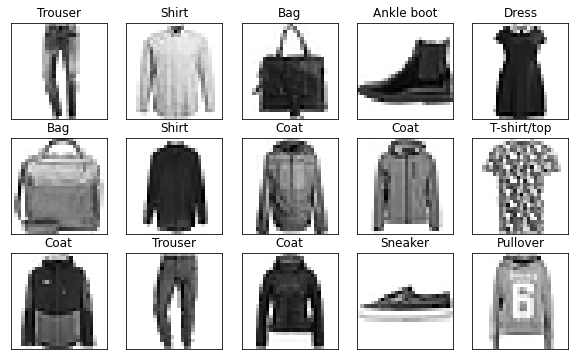

In [62]:
n_rows, n_cols = img_idx.shape
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10, 6))

for row in range(n_rows):
    for col in range(n_cols):
        ax[row, col].imshow(X_train[img_idx[row, col]], cmap='binary')
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])

        current_idx = img_idx[row, col]
        current_label_number = y_train[current_idx]
        current_label = label_names[current_label_number]
        ax[row, col].set_title(current_label)

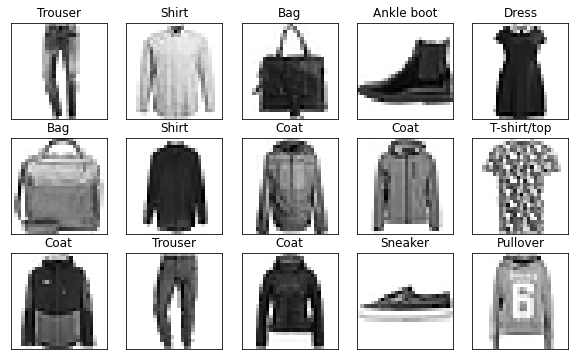

In [48]:
n_rows, n_cols = img_idx.shape
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10, 6))

for row in range(n_rows):
    for col in range(n_cols):
        ax[row, col].imshow(X_train[img_idx[row, col]], cmap='binary')
        ax[row, col].set_xticks([])
        ax[row, col].set_yticks([])
        label = label_names[y_train[img_idx[row,col]]]
        ax[row,col].title.set_text(label)

Networks, like other machine learning algorithms, learn best from scaled (e.g. standardised) data - when all numbers in a database oscillate around similar values. In this case, we scale the data by dividing all values by `255`. We do this because the highest value for the image is 255 - after dividing by 255 the range of values will be `0 - 1`.

In [64]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [72]:
X_train[29, :10, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   6,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0, 158],
       [  0,   0,   0,   0,   1,   0,   0,  90, 182, 192],
       [  0,   0,   0,   0,   0,   0, 153, 195, 178, 165],
       [  0,   0,   0,   0,   0, 147, 205,  82, 112, 190],
       [  0,   0,   0,   0,   1, 185, 177,  49, 126, 195],
       [  0,   0,   0,   0,  57, 205, 168, 177, 198, 195],
       [  0,   0,   0,   0,  89, 214, 168, 219, 213, 205]], dtype=uint8)

In [73]:
X_train[29, :10, :10].max()

219

In [74]:
219/255

0.8588235294117647

In [75]:
X_train = X_train / 255
X_test = X_test / 255

If you execute the code above a few times you scale the values to a smaller range (which in our case is not necessary). Therefore, let's make sure that the values are between 0 - 1:

In [76]:
X_train[29, :10, :10].max()

0.8588235294117647

In [78]:
255/255

1.0

In [77]:
print(X_train.min(), '-', X_train.max())
print(X_test.min(), '-', X_test.max())

0.0 - 1.0
0.0 - 1.0


If the values have a different range, scale them back to 0 - 1.

---

## We're creating the first network
Now let's create a simple network, which we will teach to recognize clothes. We will use one hidden layer with 64 neurons and an output layer with 10 neurons. Why do we need 10 neurons in the output layer?  <br><br>

Activation of the neurons in the last layer is `'softmax'` - to scale all 10 values to probability distribution.  
As the first layer we will need `Flatten` - a layer that turns a multidimensional object (e.g. photo) into a value vector. Ordinary neural networks (as opposed to convolutional networks) are not interested in the spatial structure of the photo - i.e. they are not prepared to process e.g. information about the pixel vicinity. For such regular neural networks we give a value vector, not a two-dimensional photo. The `Flatten` layer turns the photo into a vector so that the network gets the correct input. The conversion of a two-dimensional matrix (photo) into a vector is similar to a sweater rip - from a two-dimensional fabric we get one thread.

In [79]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

<div class="alert alert-block alert-success">
⚠️TASK 5
<br>

Using the code from our last class (and information from the text above), please create a Sequential `model` with 3 layers:
- Flatten
- Dense (with 64 neurons)
- Dense (with 10 neurons)
    
Think about what values the `input_shape` argument should take.<br>
The activation for the hidden layer should be `relu` and for the output layer `softmax`.

</div>

In [ ]:
# model = Sequential([
#     Flatten(input_shape=(28,28)),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

In [80]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [84]:
28*28*64 + 64

50240

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


As before, after defining the model we have to compile it.
This time we use the cost/loss function `'sparse_categorical_crossentropy'`:

* `categorical_crossentropy` is a very popular cost function for classification problems - we have used it before (`binary_crossentropy`). It compares the probabilities generated by the network for each category with the correct category.
* `'sparse'` let's add to the name to use a special version of the `categorical_crossentropy` function because `y_labels` contains values from `0` to `9` in our case, and not the so-called one-hot encoding (in one-hot encoding each category has its own column and when the image belongs to this category its column contains 1 and the rest of the columns contain zeros).

As an optimizer we choose `'adam'` and as metrics we set `'accuracy'` (but mind that the argument `metrics` takes the list of metric names, not zeros and ones!).

<div class="alert alert-block alert-success">
⚠️TASK 6
<br>

Compile the model with the above argument values.

</div>

In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

<div class="alert alert-block alert-success">
⚠️TASK 7
<br>

Let's train (=fit) the model now. Let's give it 20 epochs for training. The outcome should be stored in the `history` variable.

</div>

In [86]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5154 - accuracy: 0.8207
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3890 - accuracy: 0.8600
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3521 - accuracy: 0.8735
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3263 - accuracy: 0.8818
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3097 - accuracy: 0.8867
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8916
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2837 - accuracy: 0.8957
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.8989
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9019
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.258

We should now have the correctness on the training data of about 90 - 92%. Let's check the correctness on the test data.

<div class="alert alert-block alert-success">
⚠️TASK 8
<br>

Plot the correctness below.

</div>

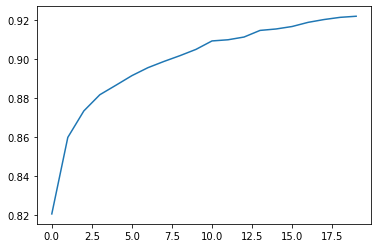

In [87]:
plt.plot(history.history['accuracy'])

What is x and what is y axis representing?

In [88]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8852


[0.354684054851532, 0.885200023651123]

The correctness should be about 88% - that's pretty good, but there's still room for improvement.

## Exploring predictions and network errors
First we will ask our model to generate predictions for all test images:

<div class="alert alert-block alert-success">
⚠️TASK 9
<br>

Using the model, please predict the label values using the `X_test` data. Store the result in the `pred` variable.

</div>

In [89]:
pred = model.predict(X_test)

In [92]:
X_test.shape

(10000, 28, 28)

In [91]:
pred.shape

(10000, 10)

Let's get the predictions for the first test image:

In [56]:
pred[0]

array([1.7192674e-08, 7.0331619e-15, 1.0353139e-12, 2.6034121e-12,
       2.4487527e-11, 2.1714644e-05, 2.8728639e-09, 3.8038767e-03,
       6.3499614e-12, 9.9617440e-01], dtype=float32)

In [95]:
label_names[9]

'Ankle boot'

<div class="alert alert-block alert-success">
⚠️TASK 10
<br>

What do these above values represent? Sum them all. What result did you get? What does it mean?

</div>

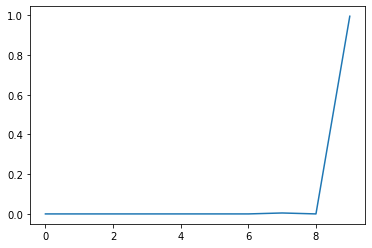

In [93]:
plt.plot(pred[0])

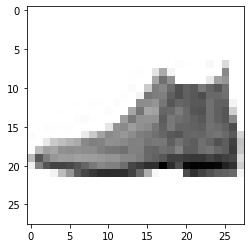

In [97]:
plt.imshow(X_test[0], cmap='binary')

<div class="alert alert-block alert-success">
⚠️TASK 11
<br>

Now, create the visualisation below, for the picture number 320 from the test dataset.

</div>

Text(0.5, 1.0, 'True label: Bag')

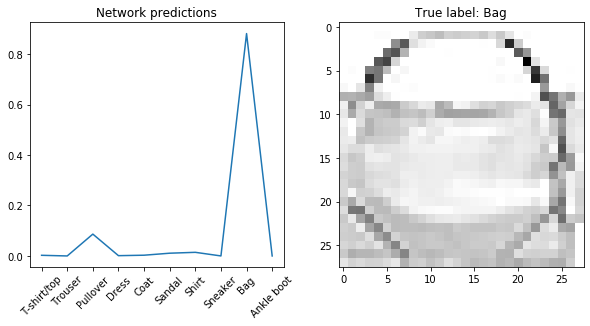

In [62]:
# select the index of the item to be displayed
test_idx = 320

# create the outline for the visualisation
fig, ax = plt.subplots (ncols=2, figsize=(10, 4.5))

# we display network predictions for the test item
ax[0].plot(

# we mark the x-axis with the appropriate names


# We add the title


# we're displaying a picture on the right
ax[1].

Check the chart above for a few other images from your training data.

<div class="alert alert-block alert-success">
⚠️TASK 12
<br>

Find and display several errors (situations where the network prediction does not match the correct test image label).

* first think about the shape of the prediction matrix and how you can turn it into a vector for the labels predicted by the network. (Hint: you will need to use `np.argmax()`)
* then, after converting the `pred` matrix into predicted labels (let's call it `pred_label`) compare the `pred_label` with the correct labels to get the boolean vector (true and false)
* finally, find in this vector the addresses (indexes) of false elements - the same addresses (indexes) of images misrecognized by the network (Hint: you can use `np.where()` function).
* use the code from the previous cell to display network predictions next to the image to display examples that the network has not recognized correctly

</div>

In [66]:
# example of the argmax function usage
np.argmax([0.3, 0.6, 0.1])

1

In [67]:
pred_label = 

In [68]:
label_correct = 

In [71]:
errors_idx = 

In [72]:
errors_idx

array([  12,   23,   25, ..., 9979, 9985, 9991], dtype=int64)

Text(0.5, 1.0, 'True label: Pullover')

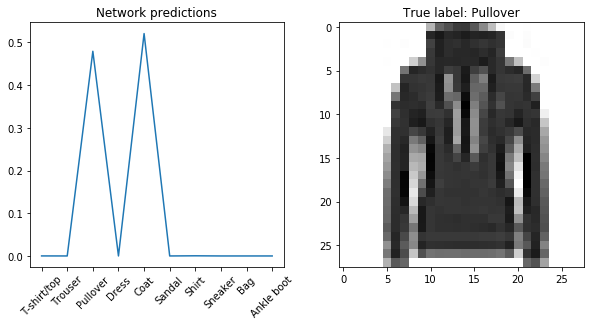

In [77]:
# select the index of the item to be displayed
test_idx = errors_idx[10]



<div class="alert alert-block alert-success">
⚠️TASK 13
<br>

Create and train a second network, `model2`, containing `128` hidden neurons. Train for 20 epochs. Check how the higher number of neurons in the `model2` network affects the correctness of training and test data.

</div>

<div class="alert alert-block alert-success">
⚠️TASK 14
<br>

Create another network `model3`, containing `64` neurons in the first hidden layer and `16` in the second hidden layer.
Train the network and compare its correctness on training and test data with previous networks.

</div>